# HuBMAP Making Dataset for Instance Segentation

## import libraries and metadata

In [1]:
import os
import json
from PIL import Image
from collections import Counter

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import tifffile as tiff
import matplotlib.pyplot as plt
from tqdm import tqdm

import cv2

In [2]:
array = tiff.imread(f'input/hubmap-hacking-the-human-vasculature/test/72e40acccadf.tif')
img_example = Image.fromarray(array)
img = np.array(img_example)
cv2.imwrite(f'72e40acccadf.png', img)

True

In [2]:
def insert_parameter_tag(d: dict, sep: str = ".") -> dict:
    """Insert a parameter tag at every important point

    Args:
        d (dict): Dictionary with flattened keys
        sep (str, optional): Key separator. Defaults to ".".

    Returns:
        dict: dict with parameter inserted
    """
    param_dict = {}
    for k, v in d.items():
        unflattened_keys = k.split(sep)
        new_keys = []
        max_num_insert = len(unflattened_keys)-2

        for i, k in enumerate(unflattened_keys):
            if k in ["model", "training", "transformations"]:
                new_keys.append(k)
                new_keys.append("parameters")
            else:
                new_keys.append(k)

        joined_key = sep.join(new_keys)
        param_dict[joined_key] = v

    return param_dict

In [3]:
def flatten_dict(d: dict, parent_key: str = "", sep: str = ".") -> dict:
    """Flatten a nested dictionary and insert the sep to seperate keys

    Args:
        d (dict): dict to flatten
        parent_key (str, optional): parent key name. Defaults to ''.
        sep (str, optional): Seperator. Defaults to '.'.

    Returns:
        dict: Flattened dict
    """
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [4]:
def remove_parameter_tag(d: dict, sep: str = ".") -> dict:
    """Remove all paramter tags from dictionary

    Args:
        d (dict): Dict must be flattened with defined seperator
        sep (str, optional): Seperator used during flattening. Defaults to ".".

    Returns:
        dict: Dict with parameter tag removed
    """
    param_dict = {}
    for k, v in d.items():
        unflattened_keys = k.split(sep)
        new_keys = []
        max_num_insert = len(unflattened_keys)
        for i, k in enumerate(unflattened_keys):
            if i < max_num_insert and k != "parameters":
                new_keys.append(k)
        joined_key = sep.join(new_keys)
        param_dict[joined_key] = v
    print(param_dict)
    # for k, v in d.items():
    #     unflattened_keys = k.split(sep)
    #     new_keys = []
    #     max_num_insert = len(unflattened_keys) - 1
    #     for i, k in enumerate(unflattened_keys):
    #         if i < max_num_insert and k != "parameters":
    #             new_keys.append(k)
    #     joined_key = sep.join(new_keys)
    #     param_dict[joined_key][unflattened_keys[-1]] = v
    # print(param_dict)
    

    return param_dict

In [5]:
test_dict = {'sweep': {'method': 'bayes', 'name': 'CellViT-SAM-H', 'metric': {'name': 'hubmap_metric', 'goal': 'minimize'}, 'run_cap': 10}, 'logging': {'mode': 'online', 'project': 'hubmap', 'notes': 'kaggle-hubmap', 'log_comment': 'kaggle-hubmap', 'tags': ['SAM-H'], 'wandb_dir': 'F://kaggle//HuBMAP//CellViT//wandb_dir', 'log_dir': 'F://kaggle//HuBMAP//CellViT//log_dir', 'level': 'info', 'log_images': True, 'group': None}, 'random_seed': 19, 'gpu': 0, 'data': {'dataset': 'PanNuke', 'dataset_path': 'configs/datasets/PanNuke', 'train_folds': [0], 'val_folds': 1, 'test_folds': 2, 'num_nuclei_classes': 2}, 'model': {'backbone': 'SAM-H', 'pretrained_encoder': 'sam_vit_h.pth', 'pretrained': 'CellViT-SAM-H-x40.pth', 'embed_dim': 1280, 'input_channels': 3, 'depth': 32, 'num_heads': 16, 'extract_layers': 5, 'shared_skip_connections': False}, 'loss': {'nuclei_binary_map': {'bce': {'loss_fn': 'xentropy_loss', 'weight': 1, 'args': {'arg1': None}}, 'dice': {'loss_fn': 'dice_loss', 'weight': 1}, 'focaltverskyloss': {'loss_fn': 'FocalTverskyLoss', 'weight': 1}}}, 'training': {'batch_size': 16, 'epochs': 100, 'unfreeze_epoch': 3, 'drop_rate': 0, 'attn_drop_rate': 0, 'drop_path_rate': 0, 'optimizer': None, 'optimizer_hyperparameter': {'lr': 0.001, 'betas': [0.85, 0.9]}, 'early_stopping_patience': 5, 'scheduler': {'scheduler_type': 'cosine'}, 'sampling_strategy': 'random', 'sampling_gamma': 0}, 'transformations': {'randomrotate90': {'p': 0.5}, 'horizontalflip': {'p': 0.5}, 'verticalflip': {'p': 0.5}, 'downscale': {'p': 0.15, 'scale': [0.5, 0.5]}, 'blur': {'p': 0.2, 'blur_limit': 10}, 'gaussnoise': {'p': 0.25, 'var_limit': 10}, 'colorjitter': {'p': 0.2, 'scale_setting': 0.25, 'scale_color': 0.1}, 'superpixels': {'p': 0.1}, 'zoomblur': {'p': 0.1}, 'randomsizedcrop': {'p': 0.1}, 'elastictransform': {'p': 0.2}, 'normalize': {'mean': [0.5, 0.5, 0.5], 'std': [0.5, 0.5, 0.5]}}, 'run_sweep': True, 'agent': None}

In [6]:
insert_parameter_tag(test_dict, '.')

{'sweep': {'method': 'bayes',
  'name': 'CellViT-SAM-H',
  'metric': {'name': 'hubmap_metric', 'goal': 'minimize'},
  'run_cap': 10},
 'logging': {'mode': 'online',
  'project': 'hubmap',
  'notes': 'kaggle-hubmap',
  'log_comment': 'kaggle-hubmap',
  'tags': ['SAM-H'],
  'wandb_dir': 'F:\\kaggle\\HuBMAP\\CellViT\\wandb_dir',
  'log_dir': 'F:\\kaggle\\HuBMAP\\CellViT\\log_dir',
  'level': 'info',
  'log_images': True,
  'group': None},
 'random_seed': 19,
 'gpu': 0,
 'data': {'dataset': 'PanNuke',
  'dataset_path': 'configs/datasets/PanNuke',
  'train_folds': [0],
  'val_folds': 1,
  'test_folds': 2,
  'num_nuclei_classes': 2},
 'model.parameters': {'backbone': 'SAM-H',
  'pretrained_encoder': 'sam_vit_h.pth',
  'pretrained': 'CellViT-SAM-H-x40.pth',
  'embed_dim': 1280,
  'input_channels': 3,
  'depth': 32,
  'num_heads': 16,
  'extract_layers': 5,
  'shared_skip_connections': False},
 'loss': {'nuclei_binary_map': {'bce': {'loss_fn': 'xentropy_loss',
    'weight': 1,
    'args': {'ar

In [7]:
flatten_dict(test_dict["training"], sep=".")

{'batch_size': 16,
 'epochs': 100,
 'unfreeze_epoch': 3,
 'drop_rate': 0,
 'attn_drop_rate': 0,
 'drop_path_rate': 0,
 'optimizer': None,
 'optimizer_hyperparameter.lr': 0.001,
 'optimizer_hyperparameter.betas': [0.85, 0.9],
 'early_stopping_patience': 5,
 'scheduler.scheduler_type': 'cosine',
 'sampling_strategy': 'random',
 'sampling_gamma': 0}

In [8]:
remove_parameter_tag(insert_parameter_tag(flatten_dict(test_dict, sep="."), '.'), '.')

{'sweep.method': 'bayes', 'sweep.name': 'CellViT-SAM-H', 'sweep.metric.name': 'hubmap_metric', 'sweep.metric.goal': 'minimize', 'sweep.run_cap': 10, 'logging.mode': 'online', 'logging.project': 'hubmap', 'logging.notes': 'kaggle-hubmap', 'logging.log_comment': 'kaggle-hubmap', 'logging.tags': ['SAM-H'], 'logging.wandb_dir': 'F:\\kaggle\\HuBMAP\\CellViT\\wandb_dir', 'logging.log_dir': 'F:\\kaggle\\HuBMAP\\CellViT\\log_dir', 'logging.level': 'info', 'logging.log_images': True, 'logging.group': None, 'random_seed': 19, 'gpu': 0, 'data.dataset': 'PanNuke', 'data.dataset_path': 'configs/datasets/PanNuke', 'data.train_folds': [0], 'data.val_folds': 1, 'data.test_folds': 2, 'data.num_nuclei_classes': 2, 'model.backbone': 'SAM-H', 'model.pretrained_encoder': 'sam_vit_h.pth', 'model.pretrained': 'CellViT-SAM-H-x40.pth', 'model.embed_dim': 1280, 'model.input_channels': 3, 'model.depth': 32, 'model.num_heads': 16, 'model.extract_layers': 5, 'model.shared_skip_connections': False, 'loss.nuclei_bin

{'sweep.method': 'bayes',
 'sweep.name': 'CellViT-SAM-H',
 'sweep.metric.name': 'hubmap_metric',
 'sweep.metric.goal': 'minimize',
 'sweep.run_cap': 10,
 'logging.mode': 'online',
 'logging.project': 'hubmap',
 'logging.notes': 'kaggle-hubmap',
 'logging.log_comment': 'kaggle-hubmap',
 'logging.tags': ['SAM-H'],
 'logging.wandb_dir': 'F:\\kaggle\\HuBMAP\\CellViT\\wandb_dir',
 'logging.log_dir': 'F:\\kaggle\\HuBMAP\\CellViT\\log_dir',
 'logging.level': 'info',
 'logging.log_images': True,
 'logging.group': None,
 'random_seed': 19,
 'gpu': 0,
 'data.dataset': 'PanNuke',
 'data.dataset_path': 'configs/datasets/PanNuke',
 'data.train_folds': [0],
 'data.val_folds': 1,
 'data.test_folds': 2,
 'data.num_nuclei_classes': 2,
 'model.backbone': 'SAM-H',
 'model.pretrained_encoder': 'sam_vit_h.pth',
 'model.pretrained': 'CellViT-SAM-H-x40.pth',
 'model.embed_dim': 1280,
 'model.input_channels': 3,
 'model.depth': 32,
 'model.num_heads': 16,
 'model.extract_layers': 5,
 'model.shared_skip_connec

In [9]:
x = {'model.backbone': 'SAM-H', 'model.pretrained_encoder': 'sam_vit_h.pth', 'model.pretrained': 'CellViT-SAM-H-x40.pth', 'model.embed_dim': 1280, 'model.input_channels': 3, 'model.depth': 32, 'model.num_heads': 16, 'model.extract_layers': 5, 'model.shared_skip_connections': False, 'training.batch_size': 16, 'training.epochs': 100, 'training.unfreeze_epoch': 3, 'training.drop_rate': 0, 'training.attn_drop_rate': 0, 'training.drop_path_rate': 0, 'training.optimizer': None, 'training.optimizer_hyperparameter.lr': 0.001, 'training.optimizer_hyperparameter.betas': [0.85, 0.9], 'training.early_stopping_patience': 5, 'training.scheduler.scheduler_type': 'cosine', 'training.sampling_strategy': 'random', 'training.sampling_gamma': 0, 'transformations.randomrotate90.p': 0.5, 'transformations.horizontalflip.p': 0.5, 'transformations.verticalflip.p': 0.5, 'transformations.downscale.p': 0.15, 'transformations.downscale.scale': [0.5, 0.5], 'transformations.blur.p': 0.2, 'transformations.blur.blur_limit': 10, 'transformations.gaussnoise.p': 0.25, 'transformations.gaussnoise.var_limit': 10, 'transformations.colorjitter.p': 0.2, 'transformations.colorjitter.scale_setting': 0.25, 'transformations.colorjitter.scale_color': 0.1, 'transformations.superpixels.p': 0.1, 'transformations.zoomblur.p': 0.1, 'transformations.randomsizedcrop.p': 0.1, 'transformations.elastictransform.p': 0.2, 'transformations.normalize.mean': [0.5, 0.5, 0.5], 'transformations.normalize.std': [0.5, 0.5, 0.5]}

In [10]:
x

{'model.backbone': 'SAM-H',
 'model.pretrained_encoder': 'sam_vit_h.pth',
 'model.pretrained': 'CellViT-SAM-H-x40.pth',
 'model.embed_dim': 1280,
 'model.input_channels': 3,
 'model.depth': 32,
 'model.num_heads': 16,
 'model.extract_layers': 5,
 'model.shared_skip_connections': False,
 'training.batch_size': 16,
 'training.epochs': 100,
 'training.unfreeze_epoch': 3,
 'training.drop_rate': 0,
 'training.attn_drop_rate': 0,
 'training.drop_path_rate': 0,
 'training.optimizer': None,
 'training.optimizer_hyperparameter.lr': 0.001,
 'training.optimizer_hyperparameter.betas': [0.85, 0.9],
 'training.early_stopping_patience': 5,
 'training.scheduler.scheduler_type': 'cosine',
 'training.sampling_strategy': 'random',
 'training.sampling_gamma': 0,
 'transformations.randomrotate90.p': 0.5,
 'transformations.horizontalflip.p': 0.5,
 'transformations.verticalflip.p': 0.5,
 'transformations.downscale.p': 0.15,
 'transformations.downscale.scale': [0.5, 0.5],
 'transformations.blur.p': 0.2,
 'tra

In [11]:
with open('input/hubmap-hacking-the-human-vasculature/polygons.jsonl', 'r') as json_file:
    json_list = list(json_file)

In [12]:
tiles_dicts = []
for json_str in json_list:
    tiles_dicts.append(json.loads(json_str))

In [13]:
tile_meta_df = pd.read_csv("input/hubmap-hacking-the-human-vasculature/tile_meta.csv")
tile_meta_df

,id,source_wsi,dataset,i,j
0,0006ff2aa7cd,2,2,16896,16420
1,000e79e206b7,6,3,10240,29184
2,00168d1b7522,2,2,14848,14884
3,00176a88fdb0,7,3,14848,25088
4,0033bbc76b6b,1,1,10240,43008
...,...,...,...,...,...
7028,ffd37b5c6598,13,3,13824,21504
7029,ffd3d193c71e,3,2,7680,16896
7030,ffd77e2517af,13,3,15872,28160
7031,ffe3cbb81f72,10,3,15456,23000


## visualize code from [[EDA] ❤️HuBMAP-HHV ~ Interactive annotations📊](https://www.kaggle.com/code/leonidkulyk/eda-hubmap-hhv-interactive-annotations/notebook)

In [14]:
def get_cartesian_coords(coords, img_height):
    coords_array = np.array(coords).squeeze()
    xs = coords_array[:, 0]
    ys = -coords_array[:, 1] + img_height
    
    return xs, ys

def plot_annotated_image(image_dict, scale_factor: int = 1.0) -> None:
    #array = tiff.imread(CFG.img_path_template.format(image_dict["id"]))
    print(image_dict["id"])
    array = tiff.imread(f'input/hubmap-hacking-the-human-vasculature/train/{image_dict["id"]}.tif')
    
    img_example = Image.fromarray(array)
    annotations = image_dict["annotations"]
    
    # create figure
    fig = go.Figure()

    # constants
    img_width = img_example.size[0]
    img_height = img_example.size[1]
    print(img_width, img_height)
    

    # add invisible scatter trace
    fig.add_trace(
        go.Scatter(
            x=[0, img_width],
            y=[0, img_height],
            mode="markers",
            marker_opacity=0
        )
    )

    # configure axes
    fig.update_xaxes(
        visible=False,
        range=[0, img_width]
    )

    fig.update_yaxes(
        visible=False,
        range=[0, img_height],
        # the scaleanchor attribute ensures that the aspect ratio stays constant
        scaleanchor="x"
    )

    # add image
    fig.add_layout_image(dict(
        x=0,
        sizex=img_width,
        y=img_height,
        sizey=img_height,
        xref="x", yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source=img_example
    ))
    
    # add polygons
    for annotation in annotations:
        name = annotation["type"]
        xs, ys = get_cartesian_coords(annotation["coordinates"], img_height)
        fig.add_trace(go.Scatter(
            x=xs, y=ys, fill="toself",
            name=name,
            hovertemplate="%{name}",
            mode='lines'
        ))

    # configure other layout
    fig.update_layout(
        width=img_width * scale_factor,
        height=img_height * scale_factor,
        margin={"l": 0, "r": 0, "t": 0, "b": 0},
        showlegend=False
    )

    # disable the autosize on double click because it adds unwanted margins around the image
    # and finally show figure
    fig.show(config={'doubleClick': 'reset'})

In [15]:
len(tiles_dicts[0]['annotations'])

9

In [16]:
plot_annotated_image(tiles_dicts[0])

0006ff2aa7cd
512 512


In [17]:
plot_annotated_image(tiles_dicts[2])

0033bbc76b6b
512 512


In [18]:
plot_annotated_image(tiles_dicts[4])

004daf1cbe75
512 512


In [19]:
plot_annotated_image(tiles_dicts[5])

005715f0a313
512 512


## make sample annotation for Instance Segmentation

In [20]:
len(tiles_dicts)

1633

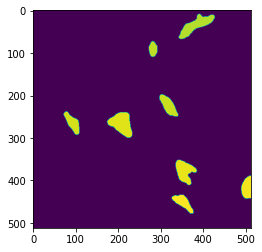

In [21]:
mask_bv = np.zeros((512, 512), dtype=np.float32)
mask_g = np.zeros((512, 512), dtype=np.float32)
mask_u = np.zeros((512, 512), dtype=np.float32)
for annot in tiles_dicts[0]['annotations']:
    cords = annot['coordinates']
    if annot['type'] == "blood_vessel":
        for cd in cords:
            rr, cc = np.array([i[1] for i in cd]), np.asarray([i[0] for i in cd])
            mask_bv[rr, cc] = 1
    elif annot['type'] == "glomerulus":
        for cd in cords:
            rr, cc = np.array([i[1] for i in cd]), np.asarray([i[0] for i in cd])
            mask_g[rr, cc] = 1
    elif annot['type'] == "unsure":
        for cd in cords:
            rr, cc = np.array([i[1] for i in cd]), np.asarray([i[0] for i in cd])
            mask_u[rr, cc] = 1


zero_img = np.zeros((512, 512, 3), dtype="uint8")
inst_k = 0
for i, mask in enumerate([mask_bv, mask_g, mask_u]):
    contours,_ = cv2.findContours((mask).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    tmp_img = np.zeros((512, 512), dtype="uint8")
    for j in range(len(contours)):
        # tmp_img = cv2.drawContours(tmp_img, contours, -1, color=(255-4*(j+1),255-4*(j+1),255-4*(j+1)))
        cv2.fillPoly(tmp_img, [contours[j][:,0,:]], (255-4*(inst_k+1),255-4*(inst_k+1),255-4*(inst_k+1)))
        inst_k += 1

    # cv2.fillPoly(tmp_img, contours, i+1)
    zero_img[:,:,i] = tmp_img
            
plt.imshow(zero_img[:,:,0])
plt.show()

In [22]:
np.unique(zero_img[:,:,0])

array([  0, 223, 227, 231, 235, 239, 243, 247, 251], dtype=uint8)

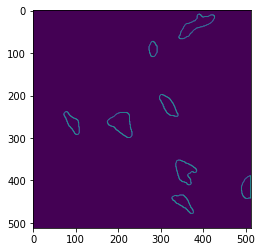

In [23]:
plt.imshow(mask_bv)
plt.show()

In [24]:
def remap_label(pred, by_size=False):
    """
    Rename all instance id so that the id is contiguous i.e [0, 1, 2, 3]
    not [0, 2, 4, 6]. The ordering of instances (which one comes first)
    is preserved unless by_size=True, then the instances will be reordered
    so that bigger nucler has smaller ID

    Args:
        pred    : the 2d array contain instances where each instances is marked
                  by non-zero integer
        by_size : renaming with larger nuclei has smaller id (on-top)
    """
    pred_id = list(np.unique(pred))
    if 0 in pred_id:
        pred_id.remove(0)
    if len(pred_id) == 0:
        return pred  # no label
    if by_size:
        pred_size = []
        for inst_id in pred_id:
            size = (pred == inst_id).sum()
            pred_size.append(size)
        # sort the id by size in descending order
        pair_list = zip(pred_id, pred_size)
        pair_list = sorted(pair_list, key=lambda x: x[1], reverse=True)
        pred_id, pred_size = zip(*pair_list)

    new_pred = np.zeros(pred.shape, np.int32)
    for idx, inst_id in enumerate(pred_id):
        new_pred[pred == inst_id] = idx + 1
    return new_pred

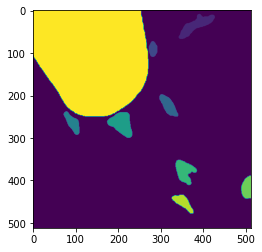

In [25]:
inst_map = np.zeros((512, 512))
num_nuc = 0
for j in range(3):
    # copy value from new array if value is not equal 0
    layer_res = remap_label(zero_img[:, :, j])
    # inst_map = np.where(mask[:,:,j] != 0, mask[:,:,j], inst_map)
    inst_map = np.where(layer_res != 0, layer_res + num_nuc, inst_map)
    num_nuc = num_nuc + np.max(layer_res)
inst_map = remap_label(inst_map)
plt.imshow(inst_map)

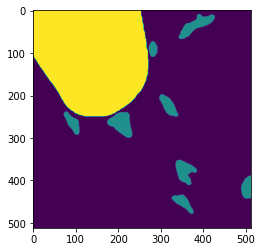

In [26]:
type_map = np.zeros((512, 512)).astype(np.int32)
for j in range(3):
    layer_res = ((j + 1) * np.clip(zero_img[:, :, j], 0, 1)).astype(np.int32)
    type_map = np.where(layer_res != 0, layer_res, type_map)
plt.imshow(type_map)

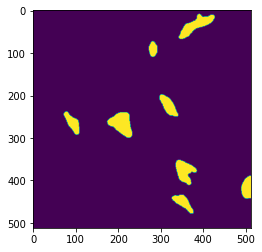

In [27]:
contours,_ = cv2.findContours((mask_bv).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
zero_img = np.zeros([mask_bv.shape[0], mask_bv.shape[1]], dtype="uint8")

cv2.fillPoly(zero_img, contours, 1)
    
plt.imshow(zero_img)
plt.show()

In [28]:
zero_img.shape

(512, 512)

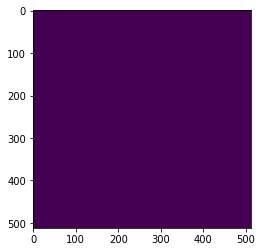

In [29]:
contours,_ = cv2.findContours((mask).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
zero_img = np.zeros([mask.shape[0], mask.shape[1]], dtype="uint8")

cv2.fillPoly(zero_img, contours, 2)
    
plt.imshow(zero_img)
plt.show()

In [30]:
zero_img.mean()

0.0

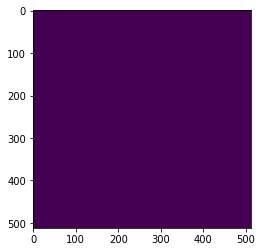

In [31]:
plt.imshow((zero_img > 0).astype(np.int32))

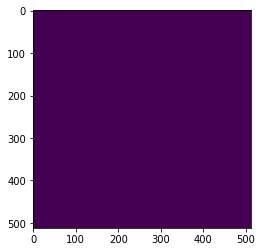

In [32]:
plt.imshow(zero_img)
plt.show()

In [33]:
print(zero_img.shape)

(512, 512)


(512, 512)
0


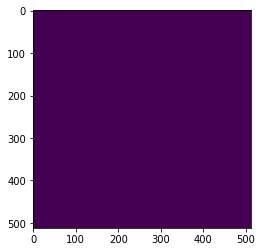

In [34]:
from copy import deepcopy
contours, hierarchy = cv2.findContours(mask.astype("uint8"), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img_with_area = zero_img
print(img_with_area.shape)

print(len(contours))


for i in range(len(contours)):
    if cv2.contourArea(contours[i]) > (mask.shape[0] * mask.shape[1]) * 0.0001:
        cv2.fillPoly(img_with_area, [contours[i][:,0,:]], (255-4*(i+1),255-4*(i+1),255-4*(i+1)), lineType=cv2.LINE_8, shift=0)
        
plt.imshow(img_with_area)
plt.show()

In [35]:
print(img_with_area.shape)

(512, 512)


## functionalize

In [36]:
from sklearn.model_selection import train_test_split

# Split the tiles_dicts list into train and test sets
train_tiles, test_tiles = train_test_split(tiles_dicts, test_size=0.2, random_state=42)

# Split the test_tiles list into validation and test sets
val_tiles, test_tiles = train_test_split(test_tiles, test_size=0.5, random_state=42)

# Print the number of tiles in each set
print("Number of tiles in train set:", len(train_tiles))
print("Number of tiles in validation set:", len(val_tiles))
print("Number of tiles in test set:", len(test_tiles))

Number of tiles in train set: 1306
Number of tiles in validation set: 163
Number of tiles in test set: 164


In [37]:
val_tiles[0]['id']

'5566406c59ee'

In [43]:
for fold, tiles_dict in enumerate([train_tiles, val_tiles, test_tiles]):
    img_ids = [tile['id']+".png" for tile in tiles_dict]
    tmp_df = pd.DataFrame({'img': img_ids})
    tmp_df["type"] = "Kidney"
    tmp_df.to_csv(f'CellViT/configs/datasets/PanNuke/fold{fold}/types.csv', index=False)

In [39]:
def make_seg_mask(tiles_dict):
    mask = np.zeros((512, 512), dtype=np.float32)
    for annot in tiles_dict['annotations']:
        cords = annot['coordinates']
        if annot['type'] == "blood_vessel":
            for cd in cords:
                rr, cc = np.array([i[1] for i in cd]), np.asarray([i[0] for i in cd])
                mask[rr, cc] = 1
                
    contours,_ = cv2.findContours((mask*255).astype(np.uint8), 1, 2)
    zero_img = np.zeros([mask.shape[0], mask.shape[1], 3], dtype="uint8")

    for p in contours:
        cv2.fillPoly(zero_img, [p], (255, 255, 255))

    contours, hierarchy = cv2.findContours(mask.astype("uint8"), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    img_with_area = zero_img

    for i in range(len(contours)):
        cv2.fillPoly(img_with_area, [contours[i][:,0,:]], (255-4*(i+1),255-4*(i+1),255-4*(i+1)), lineType=cv2.LINE_8, shift=0)
            
    return img_with_area    

In [40]:
def make_seg_mask_vit(tiles_dict):
    mask_bv = np.zeros((512, 512), dtype=np.float32)
    mask_g = np.zeros((512, 512), dtype=np.float32)
    mask_u = np.zeros((512, 512), dtype=np.float32)
    for annot in tiles_dict['annotations']:
        cords = annot['coordinates']
        if annot['type'] == "blood_vessel":
            for cd in cords:
                rr, cc = np.array([i[1] for i in cd]), np.asarray([i[0] for i in cd])
                mask_bv[rr, cc] = 1
        elif annot['type'] == "glomerulus":
            for cd in cords:
                rr, cc = np.array([i[1] for i in cd]), np.asarray([i[0] for i in cd])
                mask_g[rr, cc] = 1
        elif annot['type'] == "unsure":
            for cd in cords:
                rr, cc = np.array([i[1] for i in cd]), np.asarray([i[0] for i in cd])
                mask_u[rr, cc] = 1


    zero_img = np.zeros((512, 512, 3), dtype="uint8")
    
    num_inst = 0
    for i, mask in enumerate([mask_bv, mask_g, mask_u]):
        contours,_ = cv2.findContours((mask).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        tmp_img = np.zeros((512, 512), dtype="uint8")
        # cv2.fillPoly(tmp_img, contours, i+1)
        for j in range(len(contours)):
            cv2.fillPoly(tmp_img, [contours[j][:,0,:]], (255-4*(num_inst+1),255-4*(num_inst+1),255-4*(num_inst+1)), lineType=cv2.LINE_8, shift=0)
            num_inst += 1

        zero_img[:,:,i] = tmp_img
        
    inst_map = np.zeros((512, 512), dtype="uint8")
    num_nuc = 0
    
    for j in range(3):
        # copy value from new array if value is not equal 0
        layer_res = remap_label(zero_img[:, :, j])
        # inst_map = np.where(mask[:,:,j] != 0, mask[:,:,j], inst_map)
        inst_map = np.where(layer_res != 0, layer_res + num_nuc, inst_map)
        num_nuc = num_nuc + np.max(layer_res)
    inst_map = remap_label(inst_map)
    
    type_map = np.zeros((512, 512), dtype="uint8")
    for j in range(3):
        layer_res = ((j + 1) * np.clip(zero_img[:, :, j], 0, 1)).astype(np.int32)
        type_map = np.where(layer_res != 0, layer_res, type_map)
    
    outdict = {"inst_map": inst_map, "type_map": type_map}
    return outdict

In [42]:
from pathlib import Path
os.makedirs('train/image', exist_ok=True)
os.makedirs('train/mask', exist_ok=True)

for fold, tiles_dict in enumerate([train_tiles, val_tiles, test_tiles]):
    Path(f'CellViT/configs/datasets/PanNuke/fold{fold}/images').mkdir(exist_ok=True, parents=True)
    Path(f'CellViT/configs/datasets/PanNuke/fold{fold}/labels').mkdir(exist_ok=True, parents=True)
    for i, tldc in enumerate(tqdm(tiles_dict)):
        array = tiff.imread(f'input/hubmap-hacking-the-human-vasculature/train/{tldc["id"]}.tif')
        img_example = Image.fromarray(array)
        img = np.array(img_example)
        mask = make_seg_mask_vit(tldc)
        # if i % 100 == 0:
        #     plt.imshow(img)
        #     plt.show()
        #     plt.imshow(mask["inst_map"])
        #     plt.show()
        #     plt.imshow(mask["type_map"])
        #     plt.show()
        if np.sum(mask["inst_map"])>0:            
            cv2.imwrite(f'CellViT/configs/datasets/PanNuke/fold{fold}/images/{tldc["id"]}.png', img)
            np.save(f'CellViT/configs/datasets/PanNuke/fold{fold}/labels/{tldc["id"]}.npy', mask)
    

100%|██████████| 164/164 [00:06<00:00, 23.78it/s]


In [22]:
train_tiles

NameError: name 'train_tiles' is not defined

In [44]:
from cell_segmentation.datasets.pannuke import PanNukeDataset
dataset = PanNukeDataset(
            dataset_path="configs/datasets/PanNuke",
            folds=1
        )

ModuleNotFoundError: No module named 'cell_segmentation'